<a href="https://colab.research.google.com/github/DefCon-init/arabiccharacters/blob/master/Deep_Learning_with_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="section-one"></a>

# **1. Abstract**

The dataset is composed of 16800 Arabic characters written by 60 participants in the age range of 19-40.

We choose to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, we will prepare the data (handwritten digits images) then we will focus on the CNN modeling and evaluation.

We achieved 99.671% of accuracy with CNN trained model.

**For computational reasons, we set the number of steps (epochs) to 2.**

This Notebook follows three main parts:

* The data preparation
* The CNN modeling and evaluation
* The results prediction and submission


# **2 Preparations**
Preparing packages and data that will be used in the analysis process. Packages that will be loaded are mainly for data manipulation, data visualization and modeling. There are 2 datasets that are used in the analysis, they are train and test dataset. The main use of train dataset is to train models and use it to predict test dataset. While sample submission file is used to informed participants on the expected submission for the competition.

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=368eaea6cba8e201d4cc68bae33f438a23170f24bb5e8ac6105f3470998b2f04
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!mkdir .kaggle

In [ ]:
import json

token = {"username":"shubhangshahneu","key":"e121986dde6d08c0b616b3bf27e225d2"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json && chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!kaggle datasets download -d mloey1/ahcd1 -p /content

 50% 12.0M/24.0M [00:00<00:00, 122MB/s]
100% 24.0M/24.0M [00:00<00:00, 159MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train images 13440x32x32/train/id_5500_label_16.png  
  inflating: train images 13440x32x32/train/id_5501_label_16.png  
  inflating: train images 13440x32x32/train/id_5502_label_16.png  
  inflating: train images 13440x32x32/train/id_5503_label_16.png  
  inflating: train images 13440x32x32/train/id_5504_label_16.png  
  inflating: train images 13440x32x32/train/id_5505_label_17.png  
  inflating: train images 13440x32x32/train/id_5506_label_17.png  
  inflating: train images 13440x32x32/train/id_5507_label_17.png  
  inflating: train images 13440x32x32/train/id_5508_label_17.png  
  inflating: train images 13440x32x32/train/id_5509_label_17.png  
  inflating: train images 13440x32x32/train/id_550_label_13.png  
  inflating: train images 13440x32x32/train/id_5510_label_17.png  
  inflating: train images 13440x32x32/train/id_5511_label_17.png  
  inflating: train images 13440x32x32/train/id_5512_label_17.png  
  inflating:

# **2.1. Importing necessary Libraries**

In [ ]:
# Import the necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sn

import keras
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, BatchNormalization
# from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']


<a id="section-two"></a>
# **2. Data preparation**


<a id="section-two-a"></a>
## 2.1 Load data

In [ ]:
%ls

 ahcd1.zip                                     sample_data/
'arabic handwritten characters dataset csv'/  'test images 3360x32x32'/
'Arabic Handwritten Characters Dataset CSV'/  'Test Images 3360x32x32'/
'csvTestImages 3360x1024.csv'                 'train images 13440x32x32'/
'csvTestLabel 3360x1.csv'                     'Train Images 13440x32x32'/
'csvTrainImages 13440x1024.csv'               'Train+Test Images Matlab.mat'
'csvTrainLabel 13440x1.csv'


In [ ]:
# loading the dataset
x_train = pd.read_csv("/content/csvTrainImages 13440x1024.csv",header=None).to_numpy()
y_train = pd.read_csv("/content/csvTrainLabel 13440x1.csv",header=None).to_numpy()-1 

x_test = pd.read_csv("/content/csvTestImages 3360x1024.csv",header=None).to_numpy()
y_test = pd.read_csv("/content/csvTestLabel 3360x1.csv",header=None).to_numpy()-1

print("x_train.shape =", x_train.shape, "\ny_train.shape =", y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


Dataset has the following features:

Dataset size 13440 samples of handwritten images.
The size of each image is 28x28 pixels.

Each image has only 1 color channel, i.e., grayscale image.
Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.

<a id="section-two-c"></a>
## 2.2 Normalization

We perform a grayscale normalization to reduce the effect of illumination's differences. 

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [ ]:
# Normalize the data to make CNN faster
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print(x_train.shape)
print(y_train.shape)

(13440, 1024)
(13440, 1)


<a id="section-two-d"></a>
## 2.3 Reshape

In [ ]:
# Reshape image is 3D array (height = 28px, width = 28px , canal = 1)
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(13440, 32, 32, 1)
(13440, 1)
(3360, 32, 32, 1)
(3360, 1)


Train and test images (32px x 32px) has been stock into pandas. We reshape all data to 32x32x1 3D matrices. 

Keras requires an extra dimension in the end which correspond to channels. 

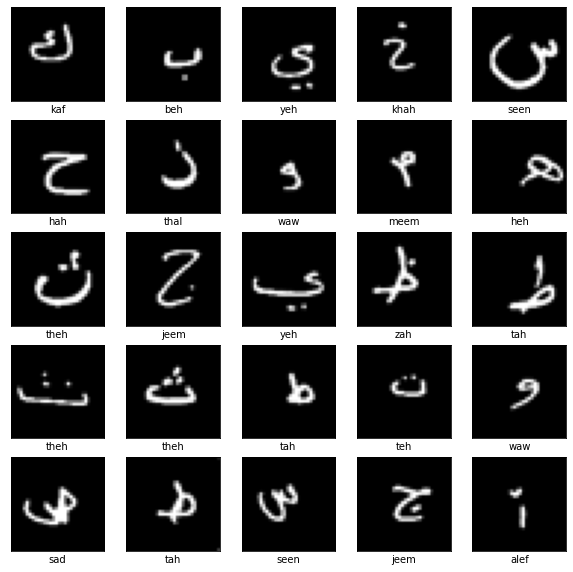

In [ ]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])])
plt.show()

<a id="section-two-e"></a>
## 2.5 Label encoding

In [ ]:
# Converting the class vector in integers to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)
for i in zip(y_train[0], arabic_characters):
    print(i)

(13440, 28) (3360, 28)
(1.0, 'alef')
(0.0, 'beh')
(0.0, 'teh')
(0.0, 'theh')
(0.0, 'jeem')
(0.0, 'hah')
(0.0, 'khah')
(0.0, 'dal')
(0.0, 'thal')
(0.0, 'reh')
(0.0, 'zain')
(0.0, 'seen')
(0.0, 'sheen')
(0.0, 'sad')
(0.0, 'dad')
(0.0, 'tah')
(0.0, 'zah')
(0.0, 'ain')
(0.0, 'ghain')
(0.0, 'feh')
(0.0, 'qaf')
(0.0, 'kaf')
(0.0, 'lam')
(0.0, 'meem')
(0.0, 'noon')
(0.0, 'heh')
(0.0, 'waw')
(0.0, 'yeh')


Labels are 28 characters of arabic_characters.

In [ ]:
print(y_train.shape)
print(y_test.shape)

(13440, 28)
(3360, 28)


# **PART A - DEEP LEARNING MODEL**

<a id="section-three"></a>
# 3. CNN


<a id="section-three-a"></a>
## 3.1 Define the model

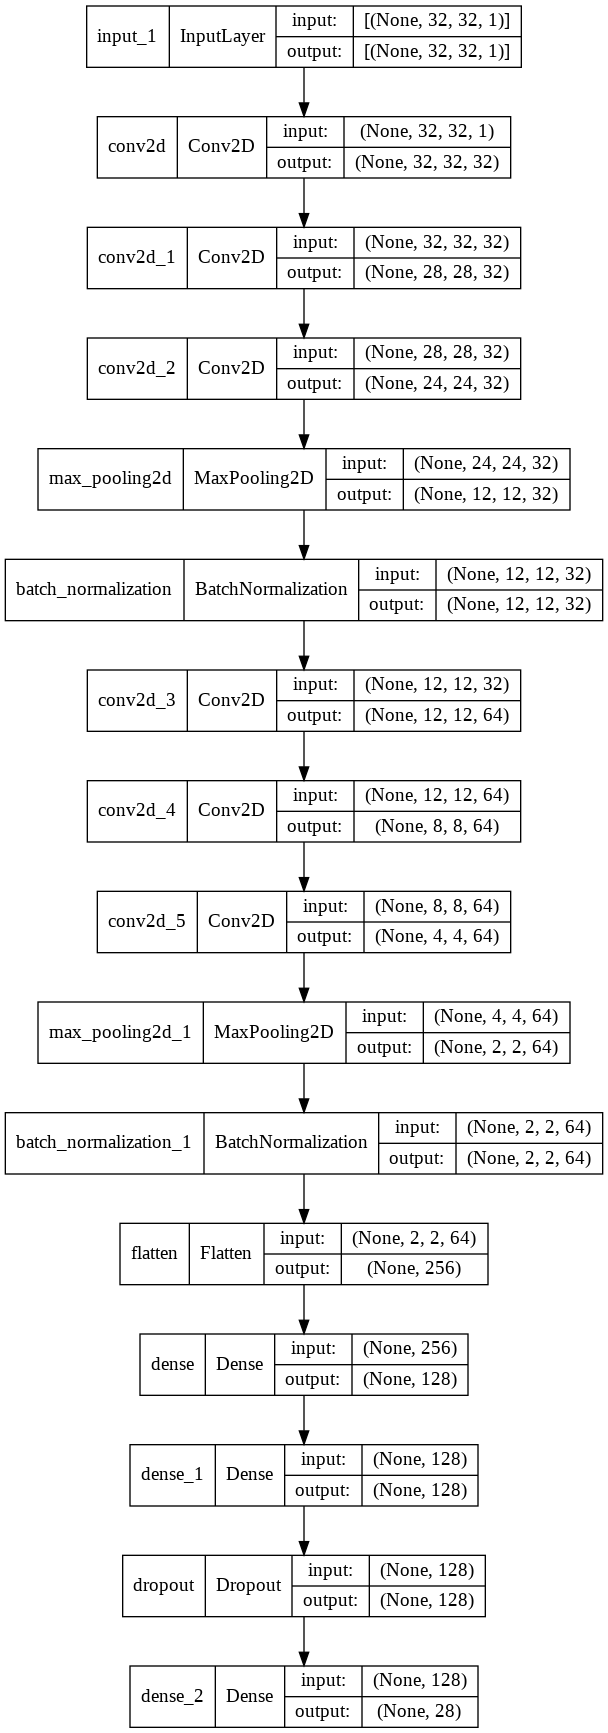

In [ ]:
#Creating CNN model
def get_model(activationFn, lossFn, optimizer):
    In = Input(shape=(32,32,1))
    x = Conv2D(32, (5,5), padding="same", activation=activationFn)(In)
    x = Conv2D(32, (5,5), activation=activationFn)(x)
    x = Conv2D(32, (5,5), activation=activationFn)(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (5,5), padding="same", activation=activationFn)(x)
    x = Conv2D(64, (5,5), activation=activationFn)(x)
    x = Conv2D(64, (5,5), activation=activationFn)(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Dense(128, activation=activationFn)(x)
    x = Dense(128, activation=activationFn)(x)
    x = Dropout(0.4)(x)
    
    Out = Dense(28, activation="softmax")(x)
    
    model = Model(In, Out)
    model.compile(loss=lossFn, optimizer=optimizer, metrics=["accuracy"])
    return model

model = get_model("relu","categorical_crossentropy","adam")
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

<a id="section-three-a"></a>
## 3.2 Data Augementation

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 20

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

For the data augmentation, we chose to :
   - Randomly rotate some training images by 10 degrees
   - Randomly  Zoom by 10% some training images
   - Randomly shift images horizontally by 10% of the width
   - Randomly shift images vertically by 10% of the height
   
We did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.07512, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.07512 to 0.32512, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.32512 to 0.72867, saving model to best.hdf5

Epoch 00004: val_accuracy improved from 0.72867 to 0.79748, saving model to best.hdf5

Epoch 00005: val_accuracy improved from 0.79748 to 0.86959, saving model to best.hdf5

Epoch 00006: val_accuracy improved from 0.86959 to 0.90084, saving model to best.hdf5

Epoch 00007: val_accuracy improved from 0.90084 to 0.91737, saving model to best.hdf5

Epoch 00008: val_accuracy did not improve from 0.91737

Epoch 00009: val_accuracy improved from 0.91737 to 0.91767, saving model to best.hdf5

Epoch 00010: val_accuracy improved from 0.91767 to 0.93690, saving model to best.hdf5

Epoch 00011: val_accuracy did not improve from 0.93690

Epoch 00012: val_accuracy did not improve from 0.93690

Epoch 00013: val_accuracy did not improve from 0.93

<a id="section-four"></a>
# 3.3. Evaluate the model


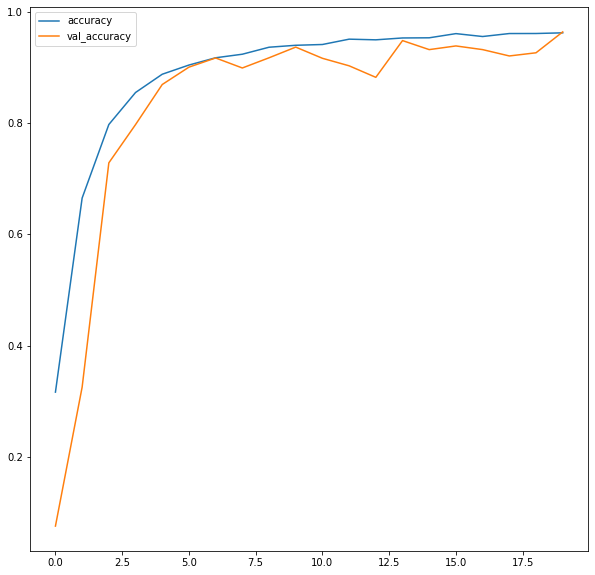

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test) 


In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 97.351190%


# **PART B - ACTIVATION FUNCTION**

We will now change the activation function **from reLU (Rectified Linear Unit) to seLU (Scaled Exponential Linear Unit)** and further observe, model efficiency.

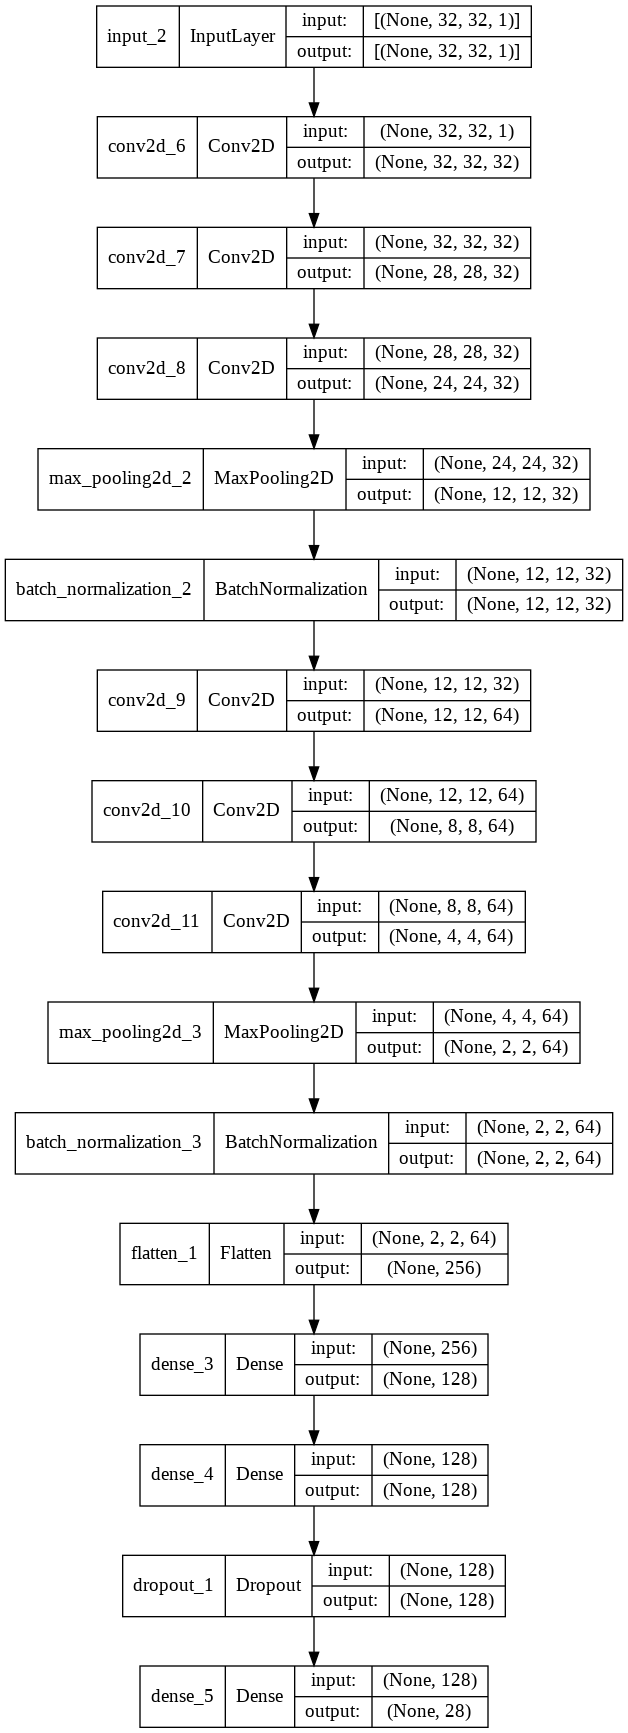

In [ ]:
model = get_model("selu","categorical_crossentropy","adam")
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 20

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.24399, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.24399 to 0.50481, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.50481 to 0.52404, saving model to best.hdf5

Epoch 00004: val_accuracy improved from 0.52404 to 0.61659, saving model to best.hdf5

Epoch 00005: val_accuracy improved from 0.61659 to 0.79688, saving model to best.hdf5

Epoch 00006: val_accuracy did not improve from 0.79688

Epoch 00007: val_accuracy did not improve from 0.79688

Epoch 00008: val_accuracy improved from 0.79688 to 0.87680, saving model to best.hdf5

Epoch 00009: val_accuracy did not improve from 0.87680

Epoch 00010: val_accuracy improved from 0.87680 to 0.91707, saving model to best.hdf5

Epoch 00011: val_accuracy improved from 0.91707 to 0.92338, saving model to best.hdf5

Epoch 00012: val_accuracy did not improve from 0.92338

Epoch 00013: val_accuracy improved from 0.92338 to 0.92819, saving model to best.h

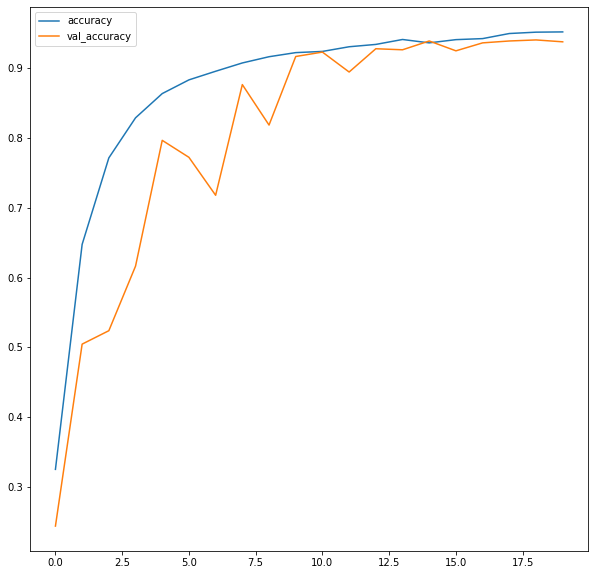

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test)

In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 95.059530%


After changing our activation function, the accuracy was decreased. Still, to further conclude the same, we will use another activation function.

We will now change our activation function from seLU to **Exponential linear unit (ELU)**.

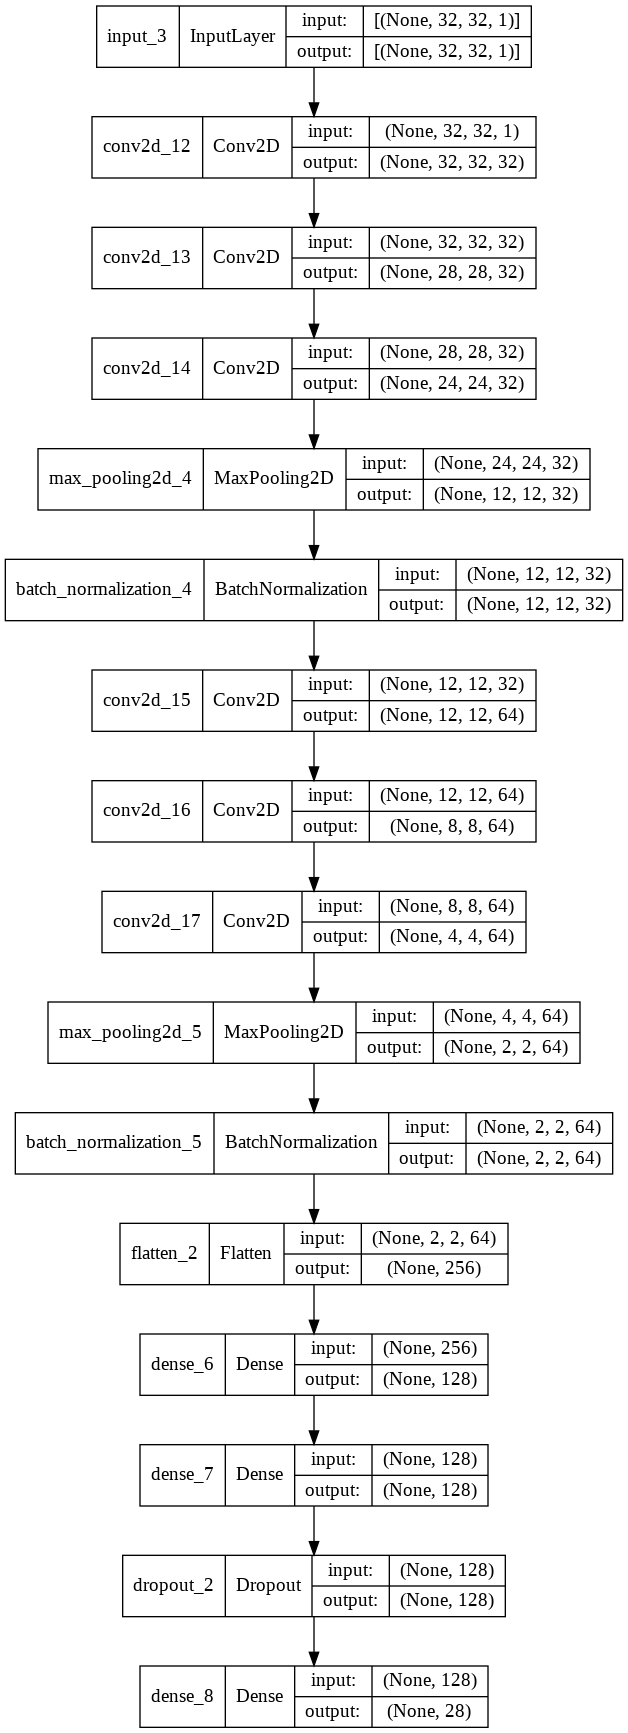

In [ ]:
model = get_model("elu","categorical_crossentropy","adam")
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 20

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.21544, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.21544 to 0.53696, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.53696 to 0.83263, saving model to best.hdf5

Epoch 00004: val_accuracy did not improve from 0.83263

Epoch 00005: val_accuracy improved from 0.83263 to 0.88431, saving model to best.hdf5

Epoch 00006: val_accuracy improved from 0.88431 to 0.88852, saving model to best.hdf5

Epoch 00007: val_accuracy improved from 0.88852 to 0.89814, saving model to best.hdf5

Epoch 00008: val_accuracy improved from 0.89814 to 0.90775, saving model to best.hdf5

Epoch 00009: val_accuracy improved from 0.90775 to 0.91106, saving model to best.hdf5

Epoch 00010: val_accuracy improved from 0.91106 to 0.91857, saving model to best.hdf5

Epoch 00011: val_accuracy did not improve from 0.91857

Epoch 00012: val_accuracy did not improve from 0.91857

Epoch 00013: val_accuracy improved from 0.91857 to 

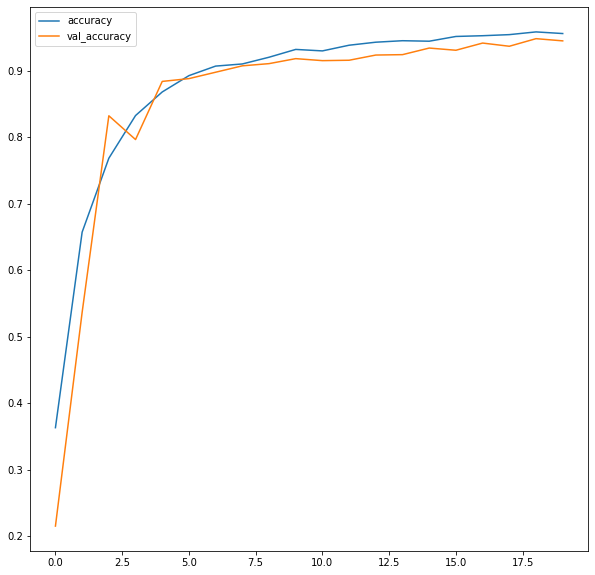

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test)

In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 96.577380%


After using reLU, seLU and ELU as our activation functions, its been observed that, **reLU** has the highest test accuracy as compared to others.

# **PART C - COST FUNCTION**

We will now change the activation function **from categorical_crossentropy to mean_squared_error** and further observe, model efficiency.

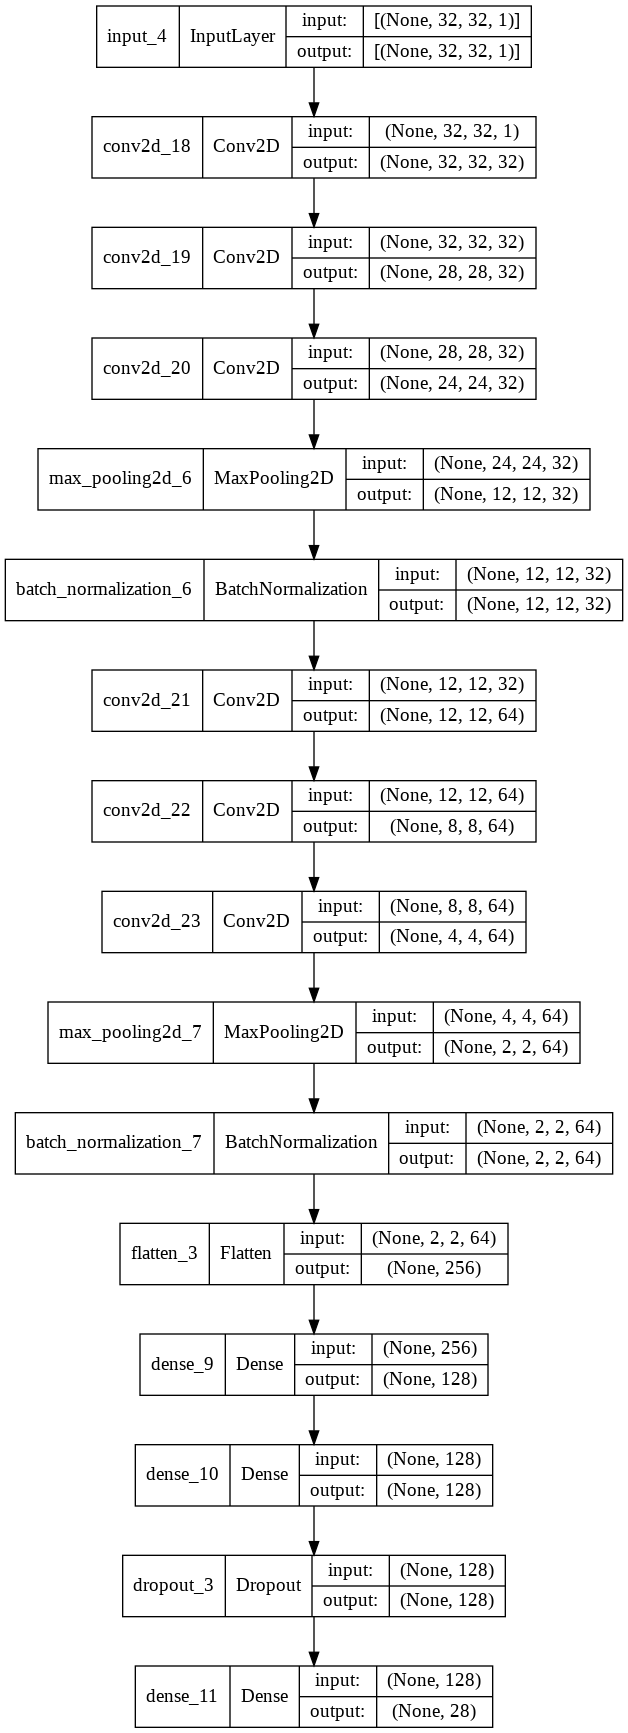

In [ ]:
model = get_model("relu","mean_squared_error","adam")
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 20

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.12230, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.12230 to 0.40084, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.40084 to 0.66196, saving model to best.hdf5

Epoch 00004: val_accuracy improved from 0.66196 to 0.83924, saving model to best.hdf5

Epoch 00005: val_accuracy did not improve from 0.83924

Epoch 00006: val_accuracy improved from 0.83924 to 0.88041, saving model to best.hdf5

Epoch 00007: val_accuracy did not improve from 0.88041

Epoch 00008: val_accuracy did not improve from 0.88041

Epoch 00009: val_accuracy did not improve from 0.88041

Epoch 00010: val_accuracy improved from 0.88041 to 0.90685, saving model to best.hdf5

Epoch 00011: val_accuracy improved from 0.90685 to 0.92638, saving model to best.hdf5

Epoch 00012: val_accuracy did not improve from 0.92638

Epoch 00013: val_accuracy improved from 0.92638 to 0.94651, saving model to best.hdf5

Epoch 00014: val_accuracy 

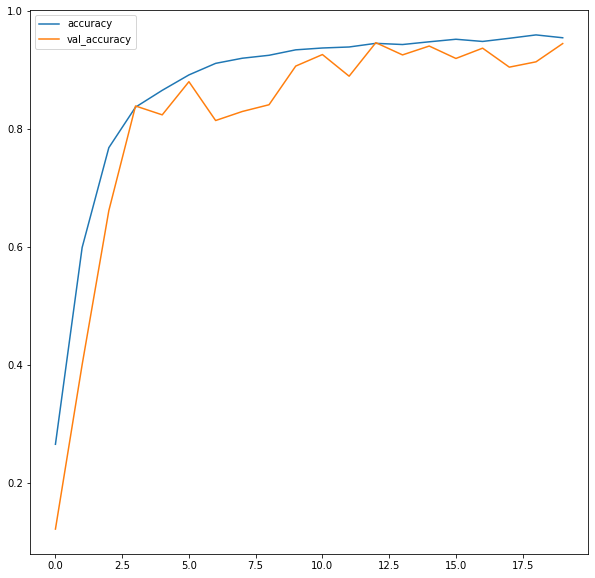

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test)

In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 96.547620%


So, we can obseve that, after changing the cost function from cross-entropy to quadratic cost, our model's test accuracy was **decreased**.

Let's use another cost function - **hinge** to observe, how our model's accuracy is affected.

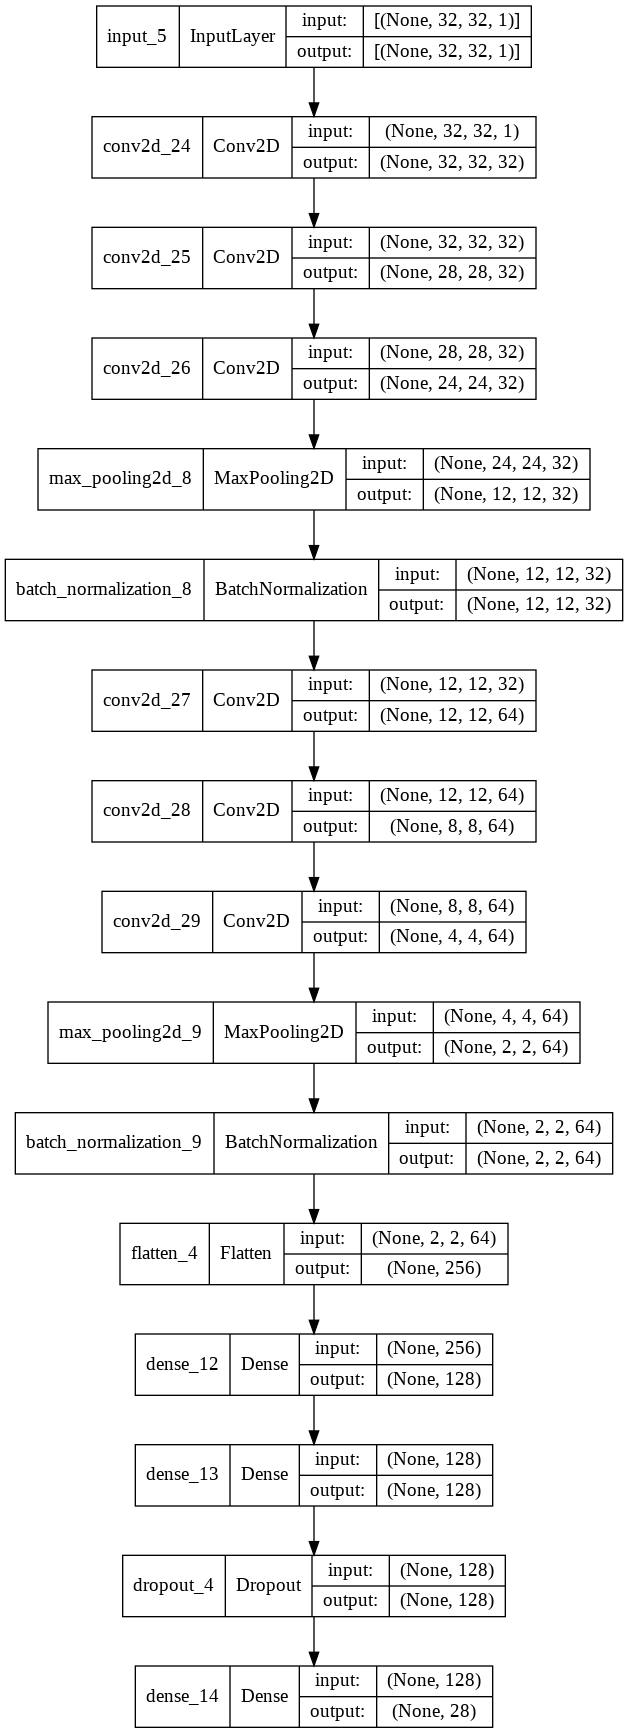

In [ ]:
model = get_model("relu","hinge","adam")
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 20

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.17488, saving model to best.hdf5

Epoch 00002: val_accuracy did not improve from 0.17488

Epoch 00003: val_accuracy improved from 0.17488 to 0.35066, saving model to best.hdf5

Epoch 00004: val_accuracy did not improve from 0.35066

Epoch 00005: val_accuracy improved from 0.35066 to 0.45463, saving model to best.hdf5

Epoch 00006: val_accuracy did not improve from 0.45463

Epoch 00007: val_accuracy did not improve from 0.45463

Epoch 00008: val_accuracy improved from 0.45463 to 0.46514, saving model to best.hdf5

Epoch 00009: val_accuracy did not improve from 0.46514

Epoch 00010: val_accuracy improved from 0.46514 to 0.49399, saving model to best.hdf5

Epoch 00011: val_accuracy improved from 0.49399 to 0.50481, saving model to best.hdf5

Epoch 00012: val_accuracy improved from 0.50481 to 0.56550, saving model to best.hdf5

Epoch 00013: val_accuracy improved from 0.56550 to 0.57091, saving model to best.hdf5

Epoch 00014: val_accuracy 

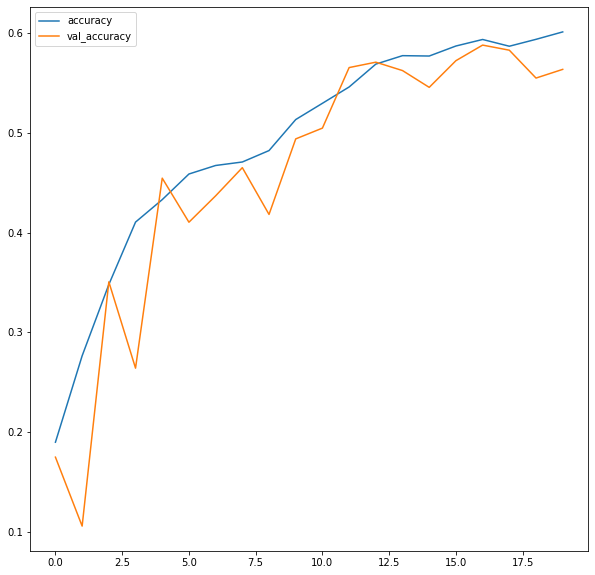

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test)

In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 58.273810%


So, we can obseve that, after using cross-entropy, quadratic cost and hinge cost function, our model's test accuracy was best with **cross-entropy**.

# **PART D - EPOCHS**

Now, we have been using Epoch = 20, now we are going to first **double** the no. of epochs and then **reduce** the same by half, in order to observe, how our model's test accuracy changes.

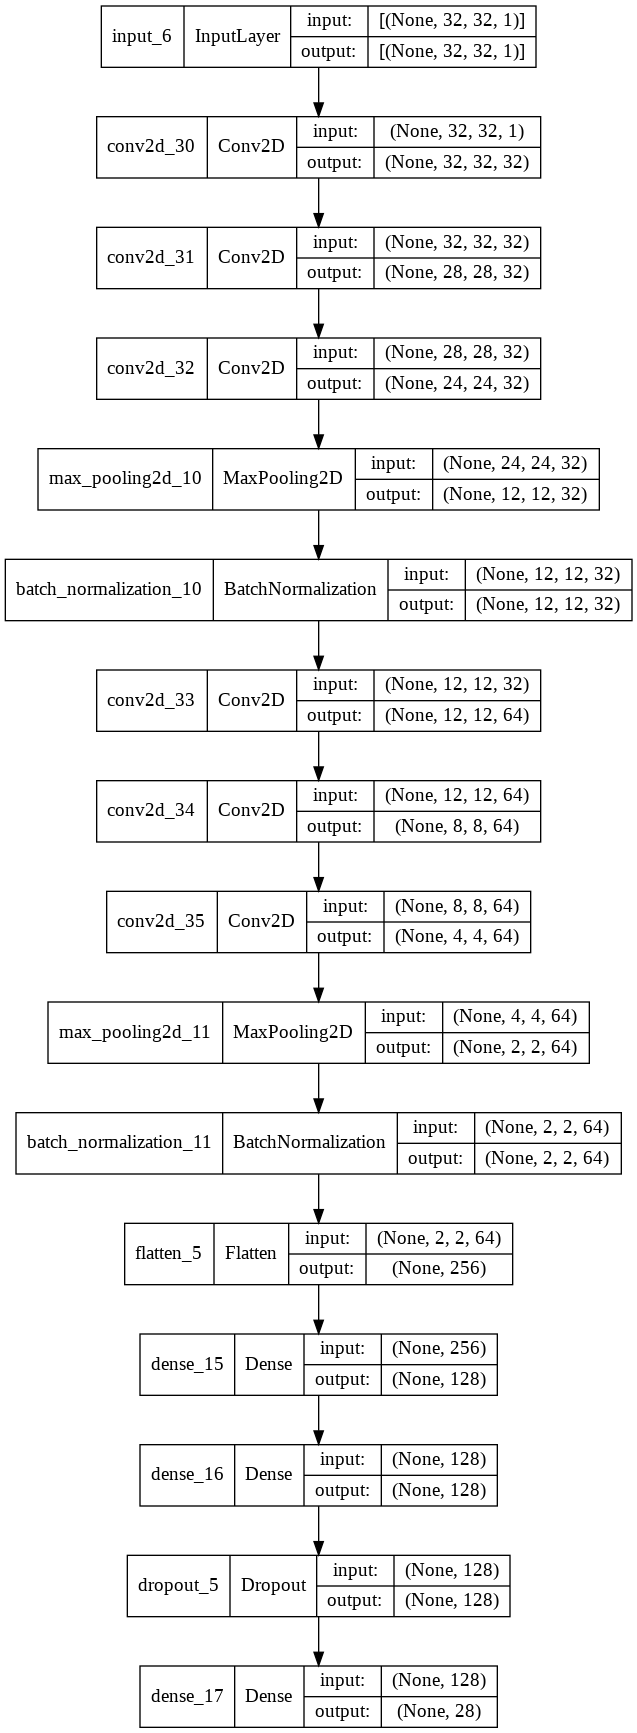

In [ ]:
model = get_model("relu","categorical_crossentropy","adam")
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 40

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.03606, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.03606 to 0.19471, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.19471 to 0.79688, saving model to best.hdf5

Epoch 00004: val_accuracy did not improve from 0.79688

Epoch 00005: val_accuracy improved from 0.79688 to 0.90024, saving model to best.hdf5

Epoch 00006: val_accuracy improved from 0.90024 to 0.92698, saving model to best.hdf5

Epoch 00007: val_accuracy improved from 0.92698 to 0.93870, saving model to best.hdf5

Epoch 00008: val_accuracy did not improve from 0.93870

Epoch 00009: val_accuracy did not improve from 0.93870

Epoch 00010: val_accuracy improved from 0.93870 to 0.94020, saving model to best.hdf5

Epoch 00011: val_accuracy did not improve from 0.94020

Epoch 00012: val_accuracy improved from 0.94020 to 0.94351, saving model to best.hdf5

Epoch 00013: val_accuracy did not improve from 0.94351

Epoch 00014: val_accuracy 

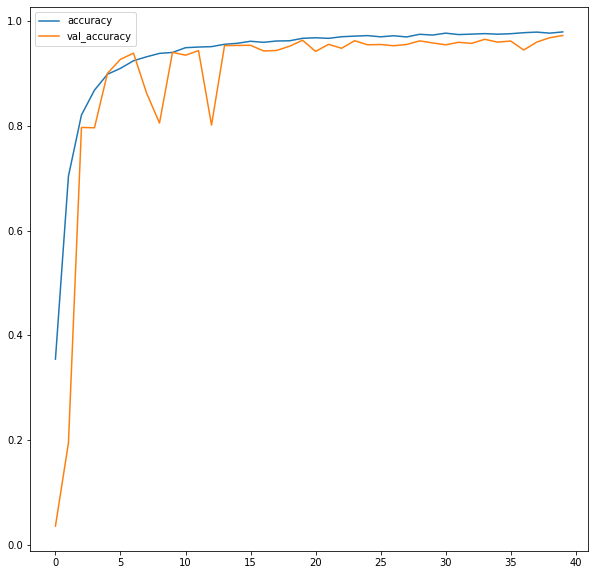

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test)

In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 97.827380%


We can observe that, our test accuracy was **increased** after doubling the no. of epochs from 20 to 40.

Now, lets see how the accuracy affects after changing the no of epochs to half, i.e 10.

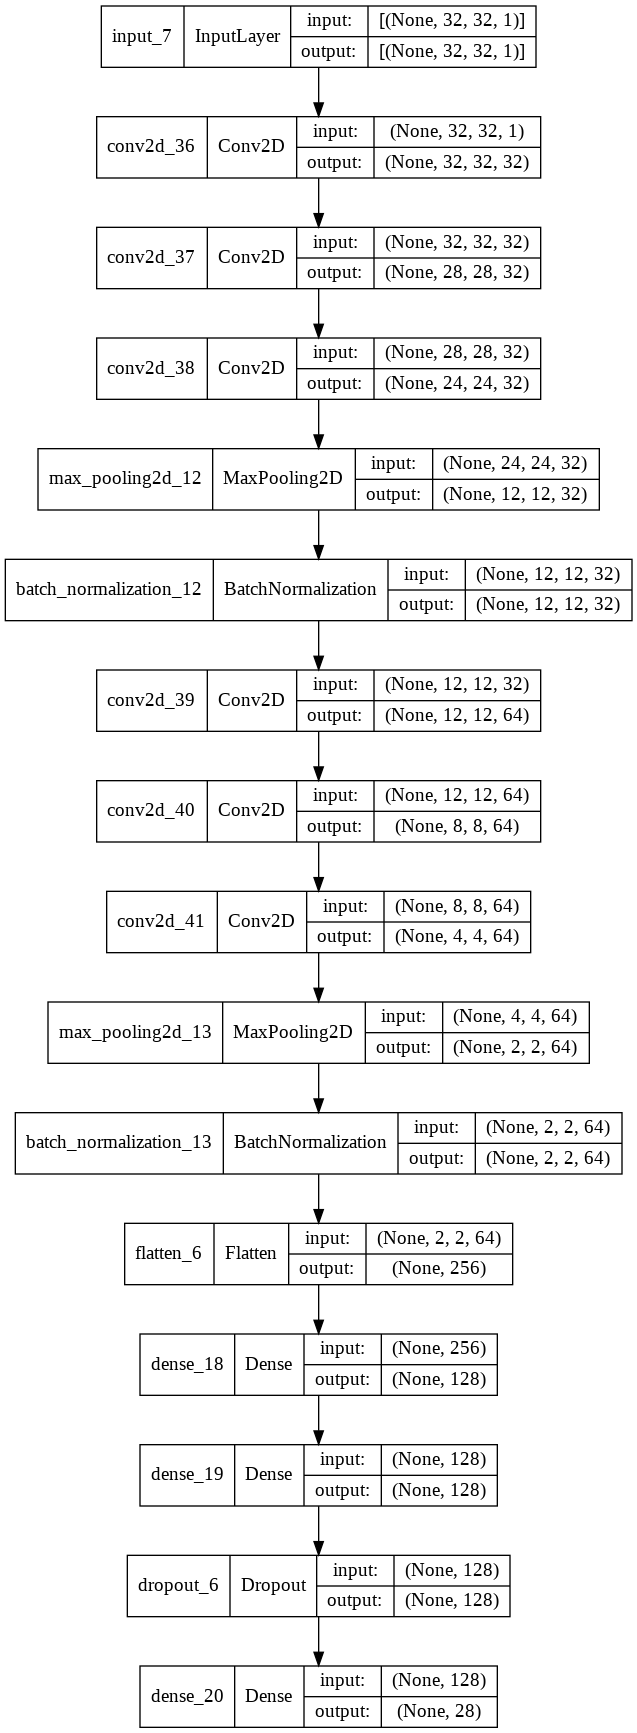

In [ ]:
model = get_model("relu","categorical_crossentropy","adam")
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 10

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.03636, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.03636 to 0.43900, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.43900 to 0.75030, saving model to best.hdf5

Epoch 00004: val_accuracy improved from 0.75030 to 0.75541, saving model to best.hdf5

Epoch 00005: val_accuracy improved from 0.75541 to 0.86358, saving model to best.hdf5

Epoch 00006: val_accuracy improved from 0.86358 to 0.90084, saving model to best.hdf5

Epoch 00007: val_accuracy did not improve from 0.90084

Epoch 00008: val_accuracy improved from 0.90084 to 0.90745, saving model to best.hdf5

Epoch 00009: val_accuracy improved from 0.90745 to 0.92248, saving model to best.hdf5

Epoch 00010: val_accuracy did not improve from 0.92248


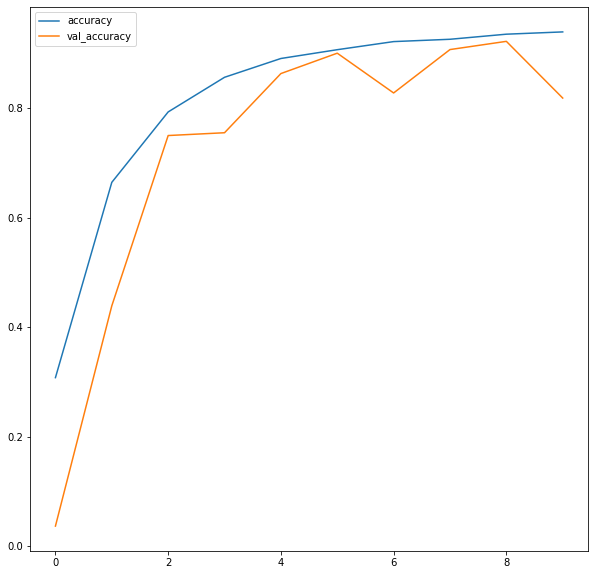

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test)

In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 79.315480%


So, we can see that, after reducing the no. of epochs, the test accuracy was also **decreased**.

# **PART E - GRADIENT ESTIMATION**

Now, we have been using 'adam' as our gradiant estimation. Now, lets change the gradiant estimation to '**rmsprop**' and further observe, model effciency.

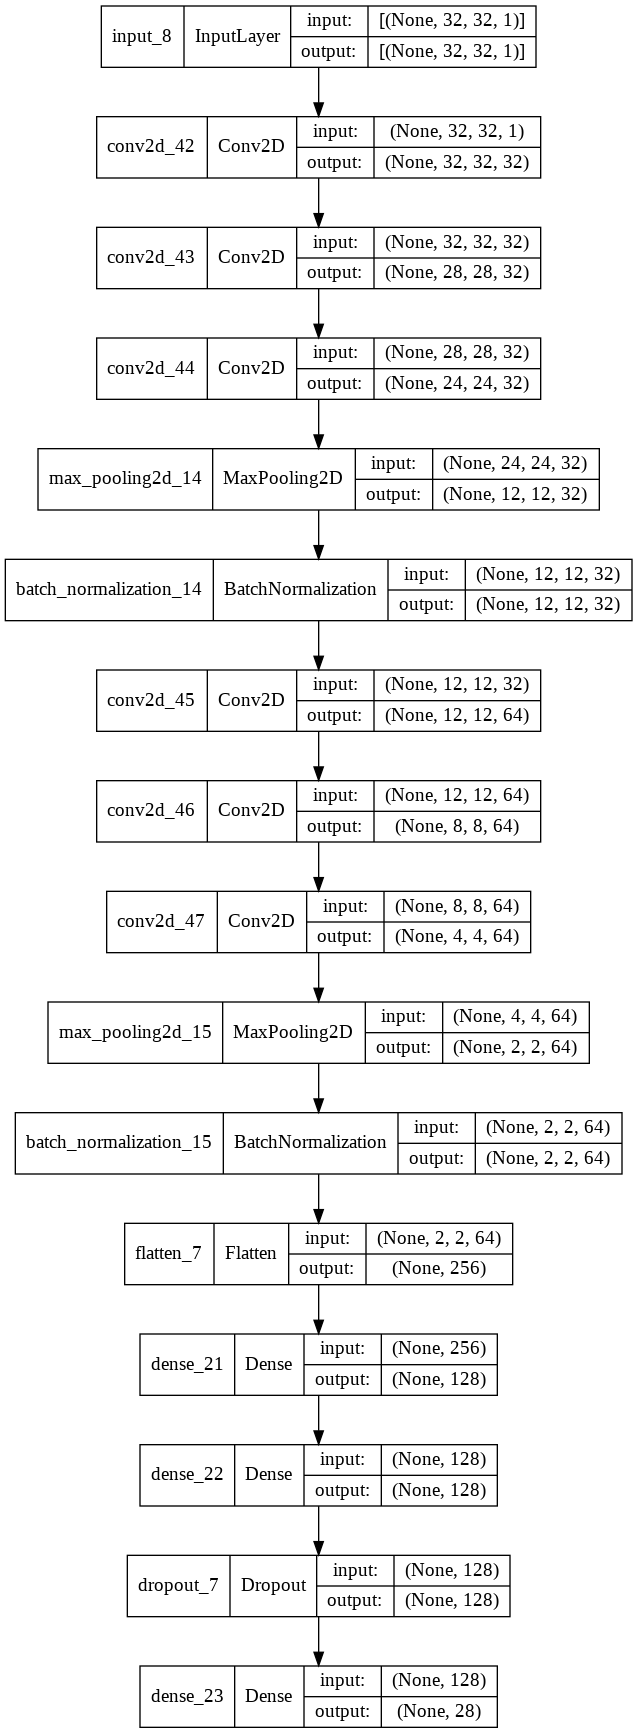

In [ ]:
model = get_model("relu","categorical_crossentropy","rmsprop")
keras.utils.vis_utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 40

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.04117, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.04117 to 0.45974, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.45974 to 0.76262, saving model to best.hdf5

Epoch 00004: val_accuracy improved from 0.76262 to 0.89483, saving model to best.hdf5

Epoch 00005: val_accuracy did not improve from 0.89483

Epoch 00006: val_accuracy did not improve from 0.89483

Epoch 00007: val_accuracy did not improve from 0.89483

Epoch 00008: val_accuracy improved from 0.89483 to 0.90805, saving model to best.hdf5

Epoch 00009: val_accuracy improved from 0.90805 to 0.92458, saving model to best.hdf5

Epoch 00010: val_accuracy did not improve from 0.92458

Epoch 00011: val_accuracy improved from 0.92458 to 0.92879, saving model to best.hdf5

Epoch 00012: val_accuracy did not improve from 0.92879

Epoch 00013: val_accuracy improved from 0.92879 to 0.94171, saving model to best.hdf5

Epoch 00014: val_accuracy 

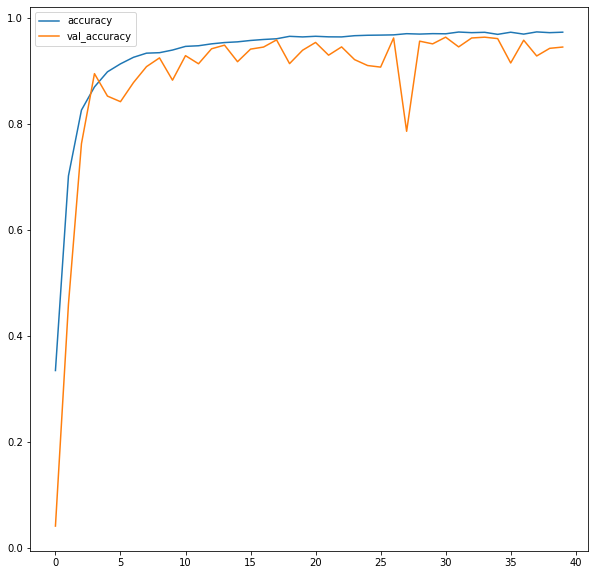

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test)

In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 96.696430%


So, we can observe that, after using RMSprop as the gradiant estimator, test accuracy was **decreased**.  

# **PART F - NETWORK ARCHITECTURE**

We will be reducing the no. of layers and further observe, how the test accuracy changes.

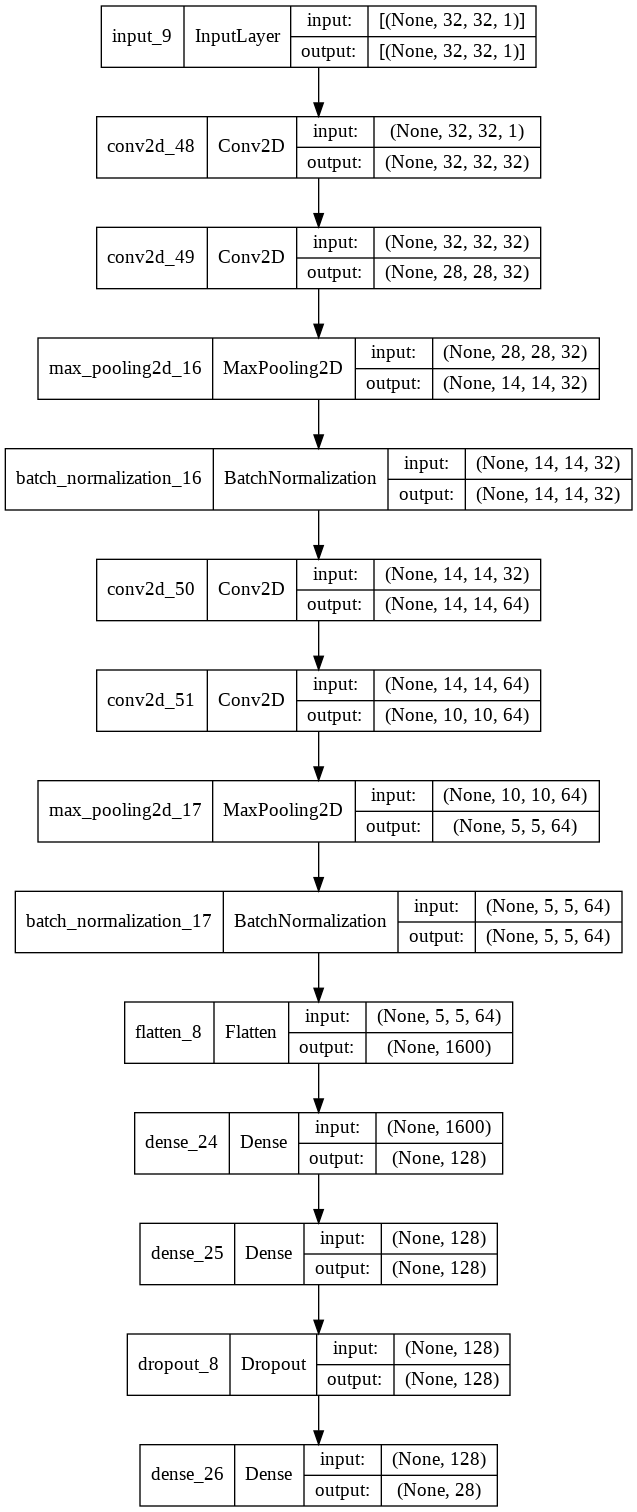

In [ ]:
#Creating CNN model
def get_network_model(activationFn, lossFn, optimizer):
    In = Input(shape=(32,32,1))
    x = Conv2D(32, (5,5), padding="same", activation=activationFn)(In)
    x = Conv2D(32, (5,5), activation=activationFn)(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (5,5), padding="same", activation=activationFn)(x)
    x = Conv2D(64, (5,5), activation=activationFn)(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Dense(128, activation=activationFn)(x)
    x = Dense(128, activation=activationFn)(x)
    x = Dropout(0.4)(x)
    
    Out = Dense(28, activation="softmax")(x)
    
    model = Model(In, Out)
    model.compile(loss=lossFn, optimizer=optimizer, metrics=["accuracy"])
    return model

network_model = get_network_model("relu","categorical_crossentropy","adam")
keras.utils.vis_utils.plot_model(network_model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 40

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = network_model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.03516, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.03516 to 0.09495, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.09495 to 0.74429, saving model to best.hdf5

Epoch 00004: val_accuracy improved from 0.74429 to 0.92097, saving model to best.hdf5

Epoch 00005: val_accuracy did not improve from 0.92097

Epoch 00006: val_accuracy did not improve from 0.92097

Epoch 00007: val_accuracy did not improve from 0.92097

Epoch 00008: val_accuracy did not improve from 0.92097

Epoch 00009: val_accuracy did not improve from 0.92097

Epoch 00010: val_accuracy improved from 0.92097 to 0.93059, saving model to best.hdf5

Epoch 00011: val_accuracy improved from 0.93059 to 0.93930, saving model to best.hdf5

Epoch 00012: val_accuracy did not improve from 0.93930

Epoch 00013: val_accuracy improved from 0.93930 to 0.95553, saving model to best.hdf5

Epoch 00014: val_accuracy did not improve from 0.95553

E

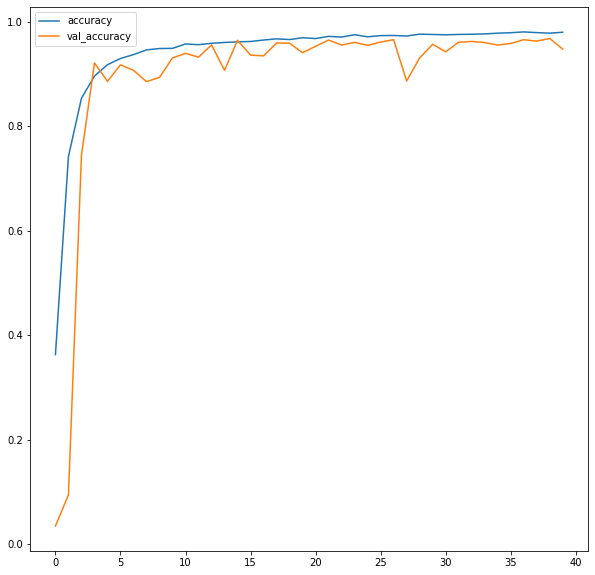

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = model.predict(x_test)

In [ ]:
# Evaluate model
score = model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 96.696430%


So after reducing the no of layers, test accuracy was **decreased**.

# **PART G - NETWORK INITIALIZATION**

We will now change the network initialization to Glorot normal initializer, also called **Xavier** normal initializer and observe the test accuracy.

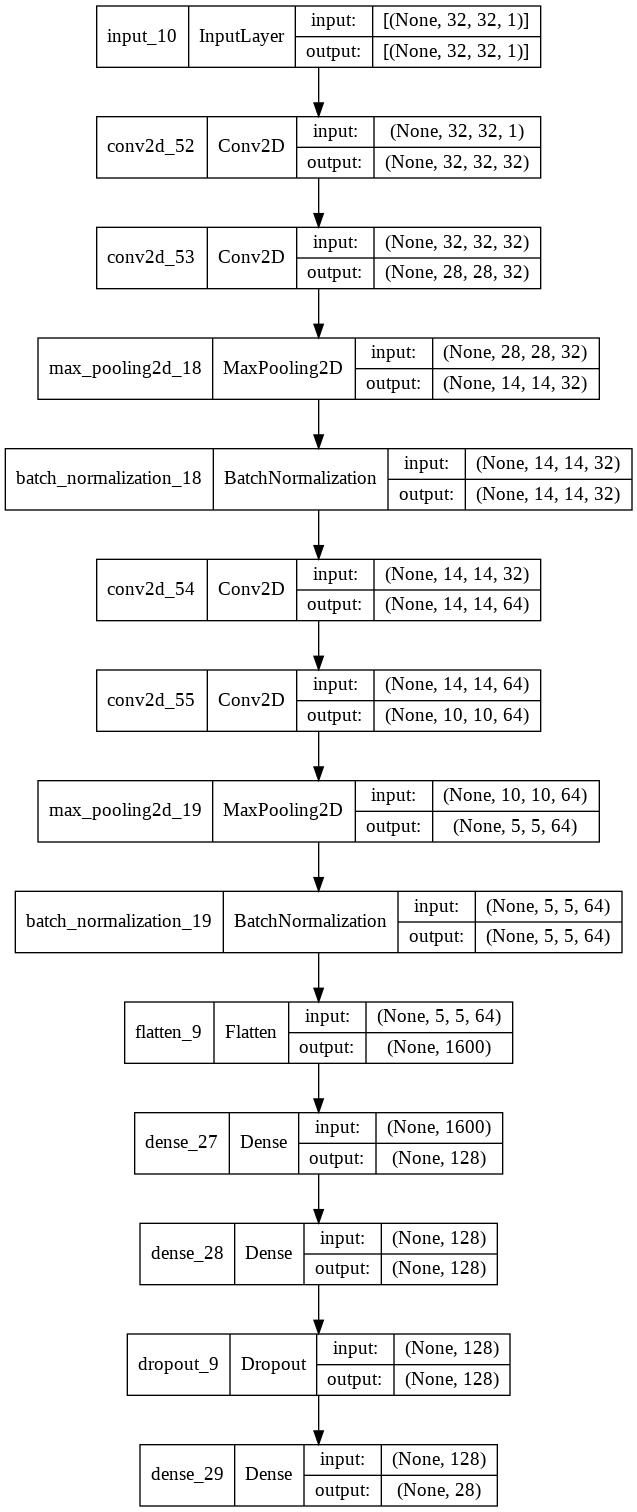

In [ ]:
#Creating CNN model
def get_network_initialization_model(activationFn, lossFn, optimizer):
    In = Input(shape=(32,32,1))
    x = Conv2D(32, (5,5), padding="same", activation=activationFn)(In)
    x = Conv2D(32, (5,5), activation=activationFn)(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (5,5), padding="same", activation=activationFn)(x)
    x = Conv2D(64, (5,5), activation=activationFn)(x)
    x = MaxPooling2D((2,2))(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Dense(128, activation=activationFn, kernel_initializer="glorot_normal")(x)
    x = Dense(128, activation=activationFn)(x)
    x = Dropout(0.4)(x)
    
    Out = Dense(28, activation="softmax")(x)
    
    model = Model(In, Out)
    model.compile(loss=lossFn, optimizer=optimizer, metrics=["accuracy"])
    return model

network_intialization_model = get_network_initialization_model("relu","categorical_crossentropy","adam")
keras.utils.vis_utils.plot_model(network_intialization_model, show_shapes=True, show_layer_names=True)

In [ ]:
# With data augmentation to prevent overfitting
'''
Let's apply some data augmentation.

Data augmentation is a set of techniques used to generate new training samples from the original ones
by applying jitters and perturbations such that the classes labels are not changed.
In the context of computer vision, these random transformations can be translating,
rotating, scaling, shearing, flipping etc.

Data augmentation is a form of regularization because the training algorithm is being
constantly presented with new training samples,
allowing it to learn more robust and discriminative patterns
and reducing overfitting.
'''



datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 64
epochs = 40

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')


history = network_intialization_model.fit_generator(train_gen, 
                              epochs = epochs,
                              verbose = 0,
                              steps_per_epoch = x_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = x_test.shape[0] // batch_size,
                              callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app



Epoch 00001: val_accuracy improved from -inf to 0.03606, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.03606 to 0.13341, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.13341 to 0.75871, saving model to best.hdf5

Epoch 00004: val_accuracy improved from 0.75871 to 0.87680, saving model to best.hdf5

Epoch 00005: val_accuracy improved from 0.87680 to 0.88882, saving model to best.hdf5

Epoch 00006: val_accuracy improved from 0.88882 to 0.90325, saving model to best.hdf5

Epoch 00007: val_accuracy did not improve from 0.90325

Epoch 00008: val_accuracy improved from 0.90325 to 0.91556, saving model to best.hdf5

Epoch 00009: val_accuracy improved from 0.91556 to 0.92127, saving model to best.hdf5

Epoch 00010: val_accuracy improved from 0.92127 to 0.94982, saving model to best.hdf5

Epoch 00011: val_accuracy did not improve from 0.94982

Epoch 00012: val_accuracy did not improve from 0.94982

Epoch 00013: val_accuracy improved from 0.94982 to 

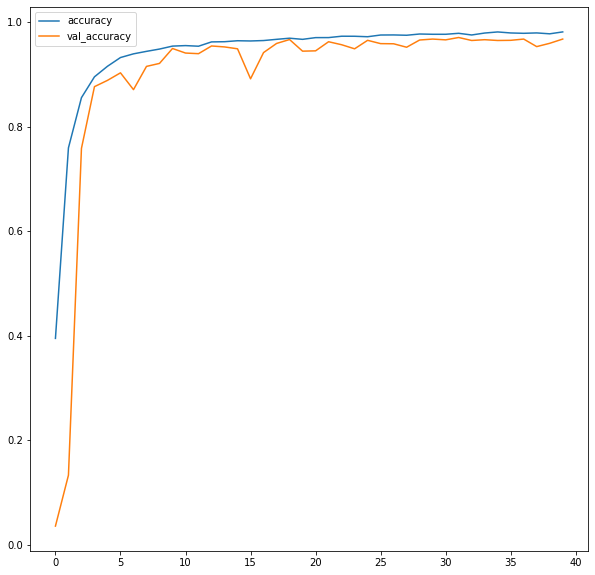

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [ ]:
# predict results y_pred
y_pred = network_intialization_model.predict(x_test)

In [ ]:
# Evaluate model
score = network_intialization_model.evaluate(x_test , y_test,verbose=3)

print('Test accuarcy: %2f%%' % round((score[1] * 100),5))

Test accuarcy: 97.946430%


So, we can observe that, after changing the network initilizer to **Xavier**, our model's test accuracy was **increased**.

# **4. Conclusion**

So, after running our model through various scenarios, we can conclude that:

1. Activation functions, do affect the overall model's accuracy. As in our case, after using relu, selu and elu, we found that, **relu** had the best test accuracy.

2. Cost function also affects the test accuracy and after using Quadratic, cross-entropy and hinge, we found that, **cross-entropy** was best suited for our model. 

3. No. of epochs also affects the test accuracy and in our model, after **doubling** the no. of epochs, test accuracy was increased and reducing the no. of epochs, further decreased accuracy.

4. After changing the gradiant estimators, we found that with **adam**, our overall test accuracy was increased. Thus, we can say that, gradiant estimator also plays a significant role in model's performance.

5. We changed the no. of layers, and then concluded that, after decreasing the no. of layers, our model's test accuracy was also decreased.

6. After changing the network initilizer to **Xavier**, our model's test accuracy was increased. So, we can conclude that, network initializaion is also important for model's accuracy.

# **5. Refrence**

https://www.kaggle.com/mloey1/ahcd1/

https://www.kaggle.com/yehyachali/arabic-mnist-with-detection/notebook

https://keras.io/about/\n

Copyright 2021 Shubhang S Shah

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.